# Homework 11 Template - Lidar & Raster Data

## About the 2013 Colorado Floods

If you haven't already, review the following chapters in the Intermediate Earth Data Science
online textbook:

* https://www.earthdatascience.org/courses/use-data-open-source-python/data-stories/what-is-lidar-data/
* https://www.earthdatascience.org/courses/use-data-open-source-python/data-stories/colorado-floods-2013/ 
* https://www.earthdatascience.org/courses/use-data-open-source-python/intro-raster-data-python/fundamentals-raster-data/


### Assignment Data

You can download the data from **earthpy** using the following syntax:

`et.data.get_data("colorado-flood")`

Using the data from the directory as follows:

In the `colorado-flood/spatial/boulder-leehill-rd/` you will see two directories - pre and post flood. Each of these directories contains a lidar sub directory that has a `DTM.tif` and a `DSM.tif` file. You will use these files to create your lidar Canopy Height Model (CHM). 


In [37]:
# Imports for autograding - do not edit!
from matplotcheck.base import PlotTester
import matplotcheck.autograde as ag
import matplotcheck.notebook as nb
from matplotcheck.raster import RasterTester
import numpy as np

<img style="float: left;" src="colored-bar.png"/>

##  Colorado Flood Data: Quantify Ecological Change Using Remote Sensing Derived Data

This week you will explore data that quantifies conditions before and after the Colorado 
Flood event which occured in 2013. You will use digital surface and terrain (elevation) 
models created using lidar data collected before and after the flood by NEON (National
Ecological Observatory Network). 

The NEON data were collected shortly before the flood event and then again after. 
In your analysis below, you will look at change associated with the before and 
after data and will quantify that change using different descriptive plots
including histograms and classified raster plots.

To begin, in the cell below add any python imports needed to complete this assignment.
Do not add imports that are not used in this notebook!

In [83]:
# Import libraries here needed to run this notebook

# YOUR CODE HERE
import os
import matplotlib.pyplot as plt
import xarray as xr
import rioxarray as rxr
import earthpy as et
import earthpy.plot as ep
import geopandas as gpd
from shapely.geometry import mapping

In [39]:
# Test package imports - DO NOT MODIFY THIS CELL!

try:
    crs = rxr
    print("\u2705 Score! rioxarray has been imported as a rxr!")
except NameError:
    print("\u274C rioxarray has not been imported as a rxr, please make sure to import is properly.")

try:
    empty_array = xr
    print("\u2705 Score! xarray has been imported as a xr!")
except NameError:
    print("\u274C xarray has not been imported as a xr, please make sure to import is properly.")

try:
    mapping_func = mapping
    print("\u2705 Score! Mapping has been imported from shapely.geometry!")
except NameError:
    print("\u274C Mapping has notbeen imported from shapely.geometryy. You need mapping to clip your data.")

✅ Score! rioxarray has been imported as a rxr!
✅ Score! xarray has been imported as a xr!
✅ Score! Mapping has been imported from shapely.geometry!


## Set Working Directory and Download Data

In the cell below complete the following task:

1. First, use **EarthPy** to download the `colorado-flood` data: `et.data.get_data("colorado-flood")`. When you download the data, the `earth-analytics/data` directory gets created on your computer for you.
2. **Use a conditional statement** to:
    * Set the working directory to the **`earth-analytics/data` directory in your home directory** if the path exists.
    * Print a helpful message if the path does not exist. 
* **Use reusable variable(s) to reduce repetition in your code.**
* Use the `os` package to ensure that the paths you create will run successfully on any operating system.


In [40]:
# Download data and set your working directory here.
# Remember that this code should work on any computer!

# YOUR CODE HERE
et.data.get_data("colorado-flood")
os.chdir(os.path.join(
    et.io.HOME,
    'earth-analytics',
    'data'
))

In [41]:
# DO NOT MODIFY THIS CELL
# Tests that the working directory is set to earth-analytics/data

path = os.path.normpath(os.getcwd())
student_wd_parts = path.split(os.sep)

wd_points = 0

if student_wd_parts[-2:] == ['earth-analytics', 'data']:
    print("\u2705 Great - it looks like your working directory is set correctly to ~/earth-analytics/data")
    wd_points += 5
else:
    print("\u274C Oops, the autograder will not run unless your working directory is set to earth-analytics/data")

print("\n \u27A1 You received {} out of 5 points for setting your working directory.".format(
    wd_points))
wd_points

✅ Great - it looks like your working directory is set correctly to ~/earth-analytics/data

 ➡ You received 5 out of 5 points for setting your working directory.


5

## Challenge 1 - Create a Pre Flood Canopy Height Model (CHM) 

Create a cropped raster map that shows positive and negative change in the 
canopy height model before compared to after the flood. To do this:

* Create a pre-flood Canopy Height Model(CHM) and a post-flood CHM using the pre and post lidar DSM (Digital Surface Model) and DTM (Digital Terrain Model) files for each time period respectively.
* Subtract the pre-flood CHM from the post-flood CHM: (`post_flood_CHM - pre_flood_CHM`).
* Crop the data using the **data/colorado-flood/spatial/boulder-leehill-rd/clip-extent.shp** shapefile.

NOTES: 
* I am asking you to subtract the pre-conditions from the post conditions to ensure 
that your negative values  represent loss of terrain. This will be easier for you to 
explain in your writeup.
* You will learn more about shapefile data in next week's class.

At the end of the cell, call the xarray object that contains the CHM data that you
created.

In [42]:
# YOUR CODE HERE
# Open data paths
data_path = os.path.join("colorado-flood", "spatial", "boulder-leehill-rd")
pre_path = os.path.join(data_path, "pre-flood", "lidar")
post_path = os.path.join(data_path, "post-flood", "lidar")

pre_dtm = rxr.open_rasterio(os.path.join(pre_path, "pre_DTM.tif"), masked=True)
pre_dsm = rxr.open_rasterio(os.path.join(pre_path, "pre_DSM.tif"), masked=True)
post_dtm = rxr.open_rasterio(os.path.join(post_path, "post_DTM.tif"), masked=True)
post_dsm = rxr.open_rasterio(os.path.join(post_path, "post_DSM.tif"), masked=True)

pre_chm = pre_dsm - pre_dtm
post_chm = post_dsm - post_dtm

# Crop by cilp extent
clip_path = os.path.join(data_path, "clip-extent.shp")
clip_shape = gpd.read_file(clip_path)

pre_chm_crop = pre_chm.rio.clip(
    clip_shape.geometry.apply(mapping), 
    clip_shape.crs
)

pre_chm_crop

<xarray.DataArray (band: 1, y: 2000, x: 3490)>
array([[[3.7200928 , 7.0499268 , 7.4000244 , ..., 0.        ,
         0.17004395, 0.960083  ],
        [2.2301025 , 2.1699219 , 2.1500244 , ..., 0.        ,
         0.09008789, 1.6400146 ],
        [7.040039  , 7.4799805 , 7.5       , ..., 0.        ,
         0.        , 0.07995605],
        ...,
        [5.5600586 , 5.209961  , 5.6799316 , ..., 0.        ,
         0.        , 0.        ],
        [3.9300537 , 5.709961  , 6.3199463 , ..., 0.        ,
         0.        , 0.        ],
        [2.8599854 , 5.51001   , 5.51001   , ..., 0.        ,
         0.        , 0.        ]]], dtype=float32)
Coordinates:
  * y            (y) float64 4.436e+06 4.436e+06 ... 4.434e+06 4.434e+06
  * x            (x) float64 4.725e+05 4.725e+05 4.725e+05 ... 4.76e+05 4.76e+05
  * band         (band) int64 1
    spatial_ref  int64 0

In [43]:
# DO NOT MODIFY THIS CELL
# Visible tests for your array

student_pre_chm_xr = _
student_pre_chm_points_visible = 0

if isinstance(student_pre_chm_xr, xr.DataArray):
    print("\u2705 Great job! Your data are stored in a DataArray!")
    student_pre_chm_points_visible += 2
else:
    print("\u274C Oops, the data are not stored in a DataArray.")

if student_pre_chm_xr.min().values.item() == 0:
    print("\u2705 The minimum value in your DataArray is correct!")
    student_pre_chm_points_visible += 1
else:
    print("\u274C The minimum value in your DataArray is incorrect.")

if round(student_pre_chm_xr.max().values.item(), 4) == 26.9301:
    print("\u2705 The maximum value in your DataArray is correct!")
    student_pre_chm_points_visible += 1
else:
    print("\u274C The maximum value in your DataArray is incorrect.")

if np.allclose(student_pre_chm_xr.rio.bounds(), (472510.0, 4434000.0, 476000.0, 4436000.0)):
    student_pre_chm_points_visible += 1
    print("\u2705 Data are cropped properly, good job!")
else:
    print("\u274C The data are not cropped properly.")

print("\n \u27A1 You received {} out of 5 points for the modified xarray.".format(
    student_pre_chm_points_visible))
student_pre_chm_points_visible

✅ Great job! Your data are stored in a DataArray!
✅ The minimum value in your DataArray is correct!
✅ The maximum value in your DataArray is correct!
✅ Data are cropped properly, good job!

 ➡ You received 5 out of 5 points for the modified xarray.


5

In [44]:
# DO NOT MODIFY THIS CELL

<img style="float: left;" src="colored-bar.png"/>

## Challenge 2 - Create a Post Flood CHM

Create a Canopy Height model using the lidar post flood data. Use the same
crop_extent data that you used for the pre-flood data to clip your data.


Call your chm array object at the end of the cell.

In [45]:
# YOUR CODE HERE
post_chm_crop = post_chm.rio.clip(
    clip_shape.geometry.apply(mapping), 
    clip_shape.crs
)

post_chm_crop

<xarray.DataArray (band: 1, y: 2000, x: 3490)>
array([[[3.7200928 , 8.439941  , 9.709961  , ..., 0.        ,
         0.        , 0.98010254],
        [3.5499268 , 7.51001   , 9.949951  , ..., 0.        ,
         0.        , 1.4000244 ],
        [2.9801025 , 4.4000244 , 4.5600586 , ..., 0.        ,
         0.        , 0.        ],
        ...,
        [5.2199707 , 4.3200684 , 5.3601074 , ..., 0.        ,
         0.        , 0.        ],
        [2.4700928 , 4.880005  , 4.329956  , ..., 0.        ,
         0.        , 0.        ],
        [0.32995605, 1.2600098 , 6.589966  , ..., 0.        ,
         0.        , 0.        ]]], dtype=float32)
Coordinates:
  * y            (y) float64 4.436e+06 4.436e+06 ... 4.434e+06 4.434e+06
  * x            (x) float64 4.725e+05 4.725e+05 4.725e+05 ... 4.76e+05 4.76e+05
  * band         (band) int64 1
    spatial_ref  int64 0

In [46]:
# DO NOT MODIFY THIS CELL
# Visible tests for your array

student_post_chm_xr = _
student_post_chm_points_visible = 0

if isinstance(student_post_chm_xr, xr.DataArray):
    print("\u2705 Great job! Your data are stored in a DataArray!")
    student_post_chm_points_visible += 2
else:
    print("\u274C Oops, the data are not stored in a DataArray.")

if student_post_chm_xr.min().values.item() == 0:
    print("\u2705 The minimum value in your DataArray is correct!")
    student_post_chm_points_visible += 1
else:
    print("\u274C The minimum value in your DataArray is incorrect.")

if round(student_post_chm_xr.max().values.item(), 4) == 27.4399:
    print("\u2705 The maximum value in your DataArray is correct!")
    student_post_chm_points_visible += 1
else:
    print("\u274C The maximum value in your DataArray is incorrect.")

if np.allclose(student_post_chm_xr.rio.bounds(), (472510.0, 4434000.0, 476000.0, 4436000.0)):
    student_post_chm_points_visible += 1
    print("\u2705 Data was cropped properly, good job!")
else:
    print("\u274C The data was not cropped properly.")

print("\n \u27A1 You received {} out of 5 points for the post flood CHM.".format(
    student_post_chm_points_visible))
student_post_chm_points_visible

✅ Great job! Your data are stored in a DataArray!
✅ The minimum value in your DataArray is correct!
✅ The maximum value in your DataArray is correct!
✅ Data was cropped properly, good job!

 ➡ You received 5 out of 5 points for the post flood CHM.


5

In [47]:
# DO NOT MODIFY THIS CELL

<img style="float: left;" src="colored-bar.png"/>

## Challenge 3: Create and Plot a Difference pre/post CHM

Use the Pre and Post flood CHMs that you created above to create a DIFFERENCE 
xarray object that shows positive and negative change in the 
canopy height model before compared to after the flood. To do this:

* Subtract the pre-flood CHM from the post-flood CHM (`post_flood_CHM - pre_flood_CHM`).
* Plot your data as a raster image (not a histogram)

**HINT: In this raster plot and ALL raster plots in this notebook, remember to turn off the axis from displaying with `axes_name_here.set_axis_off()`.**

**NOTE: I am asking you to subtract the pre-conditions from the post conditions to ensure 
that your negative values  represent loss of terrain. This will be easier for you to 
explain in your writeup!**



In [50]:
# Calculate the CHM difference (post -  pre) in this cell and call it at the end of the cell
# YOUR CODE HERE

# Calculate differences
diff_chm = post_chm_crop - pre_chm_crop
diff_chm

<xarray.DataArray (band: 1, y: 2000, x: 3490)>
array([[[ 0.        ,  1.3900146 ,  2.3099365 , ...,  0.        ,
         -0.17004395,  0.02001953],
        [ 1.3198242 ,  5.340088  ,  7.7999268 , ...,  0.        ,
         -0.09008789, -0.23999023],
        [-4.0599365 , -3.079956  , -2.9399414 , ...,  0.        ,
          0.        , -0.07995605],
        ...,
        [-0.3400879 , -0.8898926 , -0.31982422, ...,  0.        ,
          0.        ,  0.        ],
        [-1.4599609 , -0.82995605, -1.9899902 , ...,  0.        ,
          0.        ,  0.        ],
        [-2.5300293 , -4.25      ,  1.079956  , ...,  0.        ,
          0.        ,  0.        ]]], dtype=float32)
Coordinates:
  * y            (y) float64 4.436e+06 4.436e+06 ... 4.434e+06 4.434e+06
  * x            (x) float64 4.725e+05 4.725e+05 4.725e+05 ... 4.76e+05 4.76e+05
  * band         (band) int64 1
    spatial_ref  int64 0

In [51]:
# DO NOT MODIFY THIS CELL
# Visible tests for your array

student_chm_diff = _
student_chm_diff_points = 0

if isinstance(student_chm_diff, xr.DataArray):
    print("\u2705 Great job! Your data are stored in a DataArray!")
    student_chm_diff_points += 2
else:
    print("\u274C Oops, the data are not stored in a DataArray.")

if round(student_chm_diff.min().values.item(), 4) == -23.4299:
    print("\u2705 The minimum value in your DataArray is correct!")
    student_chm_diff_points += 1
else:
    print("\u274C The minimum value in your DataArray is incorrect.")

if round(student_chm_diff.max().values.item(), 4) == 24.3301:
    print("\u2705 The maximum value in your DataArray is correct!")
    student_chm_diff_points += 1
else:
    print("\u274C The maximum value in your DataArray is incorrect.")

if np.allclose(student_chm_diff.rio.bounds(), (472510.0, 4434000.0, 476000.0, 4436000.0)):
    student_chm_diff_points += 1
    print("\u2705 Data was cropped properly, good job!")
else:
    print("\u274C The data was not cropped properly.")

print("\n \u27A1 You received {} out of 5 points for the modified xarray.".format(
    student_chm_diff_points))
student_chm_diff_points

✅ Great job! Your data are stored in a DataArray!
✅ The minimum value in your DataArray is correct!
✅ The maximum value in your DataArray is correct!
✅ Data was cropped properly, good job!

 ➡ You received 5 out of 5 points for the modified xarray.


5

In [52]:
# DO NOT MODIFY THIS CELL

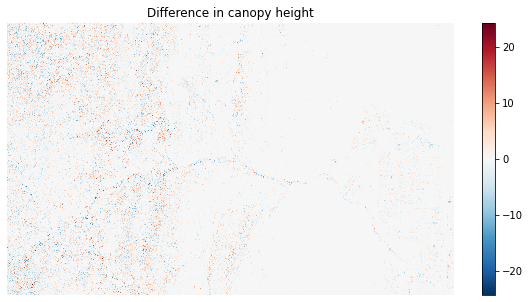

In [57]:
# Create a figure of the difference CHM object in this cell; comment out plt.show() in your code
# YOUR CODE HERE

f, ax = plt.subplots(figsize=(10, 5))
diff_chm.plot()
ax.set(title="Difference in canopy height")

ax.set_axis_off()

plot01_chm_diff = nb.convert_axes(plt)

In [54]:
# DO NOT MODIFY THIS CELL

### Manual Grade Items - Challenge 3

* Plot title explains the plot.

<img style="float: left;" src="colored-bar.png"/>

## Challenge 4: Create a Histogram Plot Using Your Difference CHM

* In your histogram, set the bins parameter (`bins=`) to **30 bins**.
* Be sure to label your x and y axes and give your plot a useful title
* Modify the color of the bars

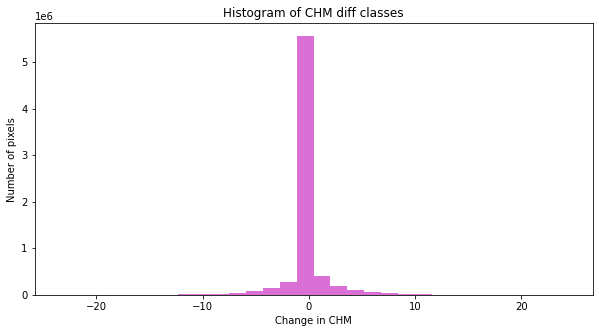

In [75]:
# IMPORTANT: Do not use plt.show in this cell

# YOUR CODE HERE
f, ax = plt.subplots(figsize=(10, 5))
diff_chm.plot.hist(
    bins=30, 
    color="orchid"
)
ax.set(
    title="Histogram of CHM diff classes",
    xlabel="Change in CHM",
    ylabel="Number of pixels"
)

### DO NOT REMOVE LINE BELOW ###
plot02_chm_diff_hist = nb.convert_axes(plt, which_axes="current")

In [76]:
# DO NOT MODIFY THIS CELL

hist_plot_2 = PlotTester(plot02_chm_diff_hist)

plot_type_test = ag.run_test(hist_plot_2.assert_plot_type,
                             plot_type='bar',
                             points=2,
                             correct_message="\u2705 Your plot is a bar plot.",
                             error_message="\u274C Check your plot type to make sure it's a bar plot.")

plot_bins_test = ag.run_test(hist_plot_2.assert_num_bins,
                             num_bins=30,
                             points=2,
                             correct_message="\u2705 Your plot has the correct amount of bins.",
                             error_message="\u274C Check that your plot has the correct amount of bins.")

print(plot_type_test['message'])
print(plot_bins_test['message'])



✅ Your plot is a bar plot.
✅ Your plot has the correct amount of bins.


### Manual Grade Items - Challenge 4

* Plot title explains the plot.
* Plot has appropriate axis labels.

### Thought Question: CHM Difference Plot 
Answer the following questions using markdown in the cell below:

1. What does each bar in the CHM difference plot histogram plot above represent?
2. What does this histogram tell you about differences in the CHM and in the landscape before vs after the flood?
 

1. Number of pixels / metric of area in the scene in change bin
2. Most changes are slightly negative (between -1 and 0)

<img style="float: left;" src="colored-bar.png"/>

## Challenge 5: Classified pre/post CHM difference Raster Plot 

In the cell below:

1. Classify your difference CHM using the bins specified below
2. Then create a raster plot of your data using xarray.
3. Add a legend to your plot with a legend entry for each of the three classes specified below.
4. Use a colormap that sets values around 0 (no change) to white or a light color.
5. Ensure your plot has an appropriate title.


HINT: Consider using one of pythons diverging colormaps which has white or a lighter color as the "middle" color for this map.
* https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html 

Use the following bins to classify your data:

* `< -1`
* `between -1 and 1` 
* `> 1`

your bins list will look like this: `[-np.inf, -1, 1, np.inf]`

Add a legend to your plot with the following categories:

* Loss
* No Change
* Gain

These categories should map to the bins that you used to classified the data.



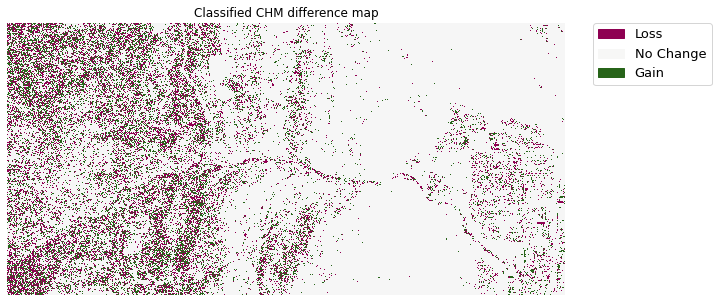

In [95]:
# IMPORTANT: Name your classified raster object diff_chm_class
# IMPORTANT: Do not use plt.show in this cell.

# YOUR CODE HERE
class_bins = [-np.inf, -1, 1, np.inf]

diff_chm = diff_chm.squeeze()

diff_chm_class = xr.apply_ufunc(
    np.digitize,
    diff_chm,
    class_bins
)

class_labels = [
    "Loss", 
    "No Change", 
    "Gain"
]


f, ax = plt.subplots(figsize=(10, 5))
im = diff_chm_class.plot.imshow(cmap="PiYG", add_colorbar=False)
et.plot.draw_legend(im, titles=class_labels)
ax.set(title="Classified CHM difference map")
ax.set_axis_off()

### DO NOT REMOVE LINE BELOW ###
plot03_chm_diff_map = nb.convert_axes(plt, which_axes="current")

In [96]:
# DO NOT MODIFY THIS CELL

<img style="float: left;" src="colored-bar.png"/>

## Challenge 6: Plot of pre/post DTM & DSM Difference Raster Histogram 

Use the data that you opened and proceed above (the cropped DTM and DSM data before and after the flood)
to create a Figure with two subplots **stacked vertically**:

1. subplot 1: a histogram showing the difference (post - pre) in the digital terrain model
2. subplot 2: a histogram showing the difference (post - pre) in the digital surface model

For each subplot:

* Subtract the pre-flood DTM (or DSM) from the post-flood DTM (or DSM) (e.g. post_flood_DTM - pre_flood_DTM).
* Set your histogram bins to `bins=[-15, -5, -2, 0 , 2, 5, 15]`
* Use `sharey=True` in your figure parameters to ensure each has the same y axis

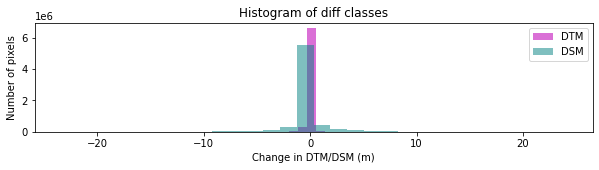

In [115]:
# IMPORTANT: Do not use plt.show in this cell. Add your code for plot 4 here

# YOUR CODE HERE
dtm_diff = post_dtm - pre_dtm
dsm_diff = post_dsm - pre_dsm

dtm_diff_crop = dtm_diff.rio.clip(
    clip_shape.geometry.apply(mapping), 
    clip_shape.crs
)
dsm_diff_crop = dsm_diff.rio.clip(
    clip_shape.geometry.apply(mapping), 
    clip_shape.crs
)

f, ax = plt.subplots(figsize=(10, 2))
# Subfigure 1
dtm_diff_crop.plot.hist(
    bins=30, 
    color="orchid",
    alpha=1,
    label="DTM"
)
# Subfigure 2
dsm_diff_crop.plot.hist(
    bins=30, 
    color="teal", 
    alpha=.5,
    label="DSM"
)
ax.set(
    title="Histogram of diff classes",
    xlabel="Change in DTM/DSM (m)",
    ylabel="Number of pixels"
)

plt.legend()

### DO NOT REMOVE LINE BELOW ###
plot04_histogram_diff = nb.convert_axes(plt, which_axes="all")

In [116]:
# DO NOT MODIFY THIS CELL
# Visible test that there are two plots stacked vertically and of type bar / hist
axes_1_position = plot04_histogram_diff[0].get_position().corners()[:, 0]
axes_2_position = plot04_histogram_diff[1].get_position().corners()[:, 0]


hist_plot_4_dsm = PlotTester(plot04_histogram_diff[0])
hist_plot_4_dtm = PlotTester(plot04_histogram_diff[1])

visible_results = []

plot_type_test_1 = ag.run_test(hist_plot_4_dsm.assert_plot_type,
                               points=1,
                               plot_type='bar',
                               correct_message="\u2705 Your top plot is a bar plot!",
                               error_message="\u274C Oops, I was expecting a bar plot.")

plot_type_test_2 = ag.run_test(hist_plot_4_dtm.assert_plot_type,
                               points=1,
                               plot_type='bar',
                               correct_message="\u2705 Your bottom plot is a bar plot!",
                               error_message="\u274C Oops, I was expecting a bar plot.")

visible_results.extend([plot_type_test_1, plot_type_test_2])

if np.array_equal(axes_1_position, axes_2_position):
    print("\u2705 Arrays are stacked vertically!")
else:
    print("\u274C Arrays are not stacked vertically.")

ag.output_results(visible_results)

IndexError: list index out of range

In [117]:
# DO NOT MODIFY THIS CELL

YOUR ANSWER HERE

###  Thought Challenge For Challenge 6 Plot

* Look at the histograms for the difference DSM compared to the DTM. What differences do you notice in the DSM difference values vs the DTM difference values?  
* What may be causing those differences between the two datasets

Add your answer below using markdown 

- DSM differences slightly negative; vegetation may have washed away
- DTM slightly postitive sediment deposition

## Pep 8, Spelling and Does the Notebook Run?
In this cell, we will give you points for the following

1. PEP 8 is followed throughout the notebook (4 points)
2. Spelling and grammar are considered in your written responses above (4 points)
3. The notebook runs from top to bottom without any editing (it is reproducible) - 4 points